In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Background Removel tricks

In [2]:
img = cv2.imread("Image/images.jpg")

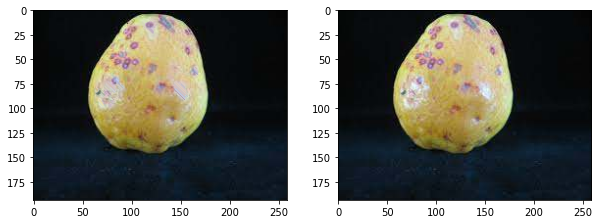

In [4]:
img = cv2.imread("Image/images.jpg")
img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
backup= img.copy()
for i in range(len(img[:,0,0])):
    for j in range(len(img[0,:,0])):
        R =int(img[i,j,0])
        G =int(img[i,j,1])
        B =int(img[i,j,2])

        sum_col = R+G+B

        if (sum_col >180) & (R>200) & (G>200) & (B>200):
            img[i,j,0] = img[i-1,j-1,0]
            img[i,j,1] = img[i-1,j-1,1]
            img[i,j,2] = img[i-1,j-1,2]

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(img) 
plt.subplot(1, 2, 2), plt.imshow(backup)
plt.show()

### Remove the flash reflextions

(221, 479, 3)


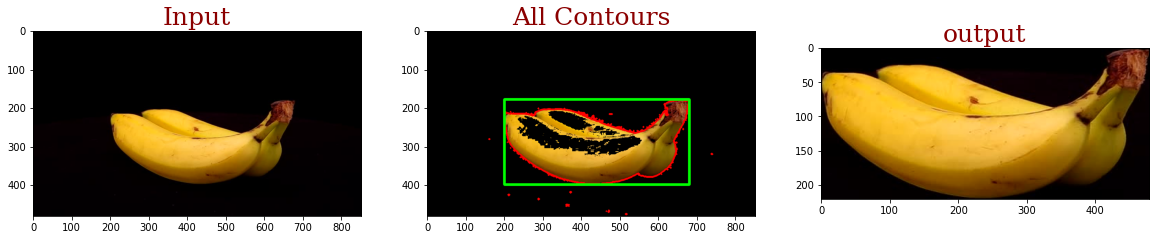

(142, 123, 3)


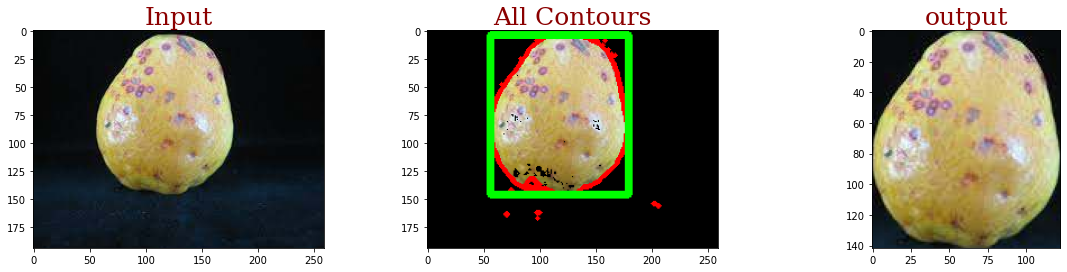

In [58]:

for i in os.listdir('Image'):
    image = cv2.imread("Image/"+ i)




    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # red color boundaries [B, G, R]
    lower = [np.mean(image[:,:,i] - np.std(image[:,:,i])/3 ) for i in range(3)]
    upper = [250, 250, 250]

    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # find the colors within the specified boundaries and apply
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask=mask)

    ret,thresh = cv2.threshold(mask, 40, 255, 0)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


    if len(contours) != 0:
        # draw in blue the contours that were founded
        cv2.drawContours(output, contours, -1, 255, 3)

        # find the biggest countour (c) by the area
        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)

        # draw the biggest contour (c) in green
        cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),5)

    foreground = image[y:y+h,x:x+w]
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1),plt.imshow(image),plt.title("Input",fontdict=font)
    plt.subplot(1,3,2),plt.imshow(output),plt.title("All Contours",fontdict=font)
    plt.subplot(1,3,3),plt.imshow(foreground),plt.title("output",fontdict=font)
    print(foreground.shape)
    plt.show()

In [56]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }
